# Logistic regression

Adapted from S. Raschka & V. Mirjalili's Python Machine Learning.

Logistic regression is a binary classifier, where the activation function is the logistic function:

$$ \phi(z) = \frac{1}{1 + e^{-z}}, $$
and the net input is a linear combination of the input: $z = w.x$.

This is equivalent to asking that the logarithm of the odds ratio $p/(1-p)$, where $p$ is the probability of a postitive outcome given an input $x$, is equal to a linear combination of $x$:
$$ \log \left(\frac{p}{1-p} \right) = w.x$$

The cost function for logistic regression is the sum of squared errors:
$$ J(w) = \frac{1}{2} (\phi(z) - y).(\phi(z) - y) $$

At each iteration, the weights $w$ are updated according to
$$ w \mapsto w - \eta \nabla J = w + \eta (y - \phi(z))^T x, $$
where $\eta$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [85]:
# import iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [86]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [87]:
# get different info from the dataset
data = np.array(iris['data'])  # data
target = np.array(iris['target'])  # classifications

n_samples = data.shape[0]
n_features = data.shape[1]

target_names = iris['target_names']
feature_names = iris['feature_names']

In [88]:
data.shape, target.shape

((150, 4), (150,))

In [89]:
from ml.utils import scale_features, shuffle_training_examples

In [90]:
# normalise the features
data = scale_features(data)

In [91]:
# import Logistic Regression class
from ml.linear_classifier import LogisticRegression

In [92]:
# create a logistic regression instance, with random state 1 and regularisation parameter 1
classifier = LogisticRegression(random_state=1, c=1)

In [93]:
# create a binary classifier for iris type = 1
y = np.where(target == 1, 1, 0)

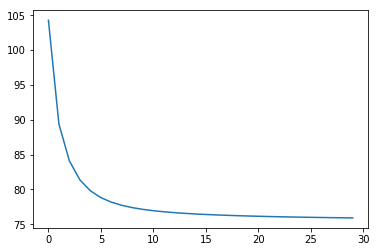

In [97]:
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = classifier.fit(data, y, 30, 0.01)
plt.plot(cost_per_iteration)

In [98]:
print("n errors: %i" % (classifier.predict(data) - y != 0).sum())

n errors: 41


In [99]:
classifier.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

### Using both training and test sets

In [100]:
# shuffle the training data, not forgetting to keep the data and its classification aligned
shuffled_data, shuffled_target = shuffle_training_examples(data, target)
shuffled_data[:5], shuffled_target[:5]

(array([[ 0.18982966, -1.97355361,  0.70592084,  0.3957741 ],
        [ 1.03800476,  0.09821729,  1.0469454 ,  1.58046376],
        [-0.29484182, -0.59237301,  0.64908342,  1.05393502],
        [-0.53717756,  0.78880759, -1.16971425, -1.3154443 ],
        [-0.17367395, -1.28296331,  0.70592084,  1.05393502]]),
 array([2., 2., 2., 0., 2.]))

In [101]:
# create a binary classifier for iris type = 1
shuffled_y = np.where(shuffled_target == 1, 1, 0)

In [102]:
n_training = 135

training_set = shuffled_data[:n_training,:]
training_y = shuffled_y[:n_training]

test_set = shuffled_data[n_training:,:]
test_y = shuffled_y[n_training:]

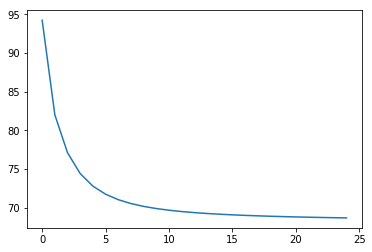

In [103]:
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = classifier.fit(training_set, training_y, 25, 0.01)
plt.plot(cost_per_iteration)

In [104]:
print("n errors in train: %i" % (classifier.predict(training_set) - training_y != 0).sum())
print("n errors in test: %i" % (classifier.predict(test_set) - test_y != 0).sum())

n errors in train: 35
n errors in test: 5


## Using sklearn

In [107]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression(C=100.0, random_state=1, solver='liblinear')
lr.fit(training_set, training_y)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
print("n errors in train: %i" % (lr.predict(training_set) - training_y != 0).sum())
print("n errors in test: %i" % (lr.predict(test_set) - test_y != 0).sum())

n errors in train: 36
n errors in test: 4
